Big Brother Big Sisters Twin Cities - Duluth Krakens
 
# MinneMudac 2025 Competition

Timothy Hanson, Cole Diekow, Cyrus Slinger, Anthony Herger
4/29/2025


**Table of Contents**
 
Executive Summary  

Data Understanding

Exploratory Data Analysis (EDA)

Data Preparation

Modeling and Predictive Analytics

Deployment

Similar Projects


# Executive Summary

This project advances the analysis of mentoring relationships within Big Brothers Big Sisters Twin Cities by developing predictive models to enhance match longevity and program effectiveness. Now building on Project #1’s exploratory data analysis (EDA), Project #2’s modeling and predictive analytics, Project #3 will continue to identify key drivers of successful mentor-mentee pairings and reduce early match terminations. Utilizing historical match data, we constructed four models—Linear Regression, Logistic Regression, XGBoost, and Random Forest—to predict match duration and success status. Key findings highlight that mentors aged 30–40, moderate note frequency (≤2 notes/month), summer programming, and positive family involvement significantly extend match durations, offering actionable strategies for program optimization. The dataset, sourced from the MinneMUDAC 2025 challenge, was rigorously cleaned to address missing values and outliers, ensuring robust model performance. Challenges included handling class imbalances in success status predictions and refining text analytics (e.g., WordCloud, TF-IDF) to uncover qualitative insights from match support notes. These models and insights enable data-driven decisions to improve mentor training, monitor at-risk matches, and enhance engagement, ultimately supporting BBBS’s mission to serve 2,200 youth annually with longer-lasting, impactful mentorships.

# Business Understanding

This project aims to analyze and predict the length of mentoring relationships within a community organization, leveraging historical match data to build predictive models. By identifying key factors that contribute to match longevity, the project provides actionable insights to improve mentor-mentee pairing, enhance program effectiveness, and reduce early match terminations. The organization serves approximately 2,200 youth annually across various mentoring initiatives, making match retention a critical business objective. The ultimate goal is to increase the average match length beyond the current 50-month benchmark, ensuring longer-lasting and more impactful mentorship experiences.

**Application Domain & SMART Questions**

Operating within the mentorship and social services domain, this project focuses on improving the effectiveness and longevity of mentor-mentee relationships. A key research question is how mentoring organizations can adjust match support call strategies to increase the average match length by at least 10% over the next two years. The project also seeks to analyze how different demographic, behavioral, and program-related variables influence match longevity and how these insights can be used to improve mentor-mentee pairing criteria.

**Business Success Criteria**

The success of this project will be measured by several key factors. One objective is to increase the average match length from 50 months to at least 55 months. Improving early detection of at-risk matches will enable proactive intervention, ultimately increasing retention rates. Additionally, the project aims to develop a set of evidence-based recommendations to enhance match longevity. The predictive model should achieve high accuracy, measured by low RMSE, to support match support strategies. Insights from the data will be used to enhance mentor training, ensuring longer-lasting and more impactful relationships.

**Data Analytics Problem Type**

This project falls under the category of making predictions, as it aims to forecast the remaining length of a mentoring relationship based on historical data. It is a supervised learning problem, given that the dataset contains labeled outcomes, including known match lengths and closure reasons. Since the objective is to estimate match longevity, the predictive model will employ regression techniques, evaluated using RMSE. Additionally, understanding closure reasons may involve categorization, as different factors contribute to why a match ends.


In [5]:
df <- read.csv("/kaggle/input/big-brothers-big-sisters-data-structure/BA Project Data.csv",
               fileEncoding = "latin1")
df


Field.ID,Field.Name,Short.Description,Notes
<int>,<chr>,<chr>,<chr>
1,Match ID 18Char,Unique ID for each Big/Little Match,"No nulls, there are 3275 unique entries and 39345 rows total"
2,Completion Date,Date for Match Support Contact Notes,"The most recent completion date for the data was: ""2025-02-24 UTC"", with the first recorded date being: ""2017-01-11 UTC"""
3,Match Support Contact Notes,Check in Notes of how a match is going,The notes correlate to a Completion Date which indicates the time of a match meeting
4,Stage,Match status,"Has three different categories, Active, Closed, and Pending Closure"
5,Little ID,Little's Unique ID,"No nas, has 2998 unique little IDs"
6,Big ID,Big's Unique ID,"No nas, has 3080 unique big IDs"
7,Big County,County of the Big,6988 nas
8,Big Age,Age of the Big,"No nas, average age of a big is 36.77"
9,Big Occupation,Occupation of Big,"3,349 na values"


**Data Acquisition and Collection**

All data is provided in Excel format. The primary key in the dataset is the match ID, which represents mentor-mentee relationships. Each match ID is associated with multiple records due to match support contact notes, which are typically logged monthly. Since the data is structured with periodic updates, time series analysis may be applicable. Identifying an instance in the dataset requires both the match ID and date. Additionally, the status field represents the activity level of the relationship, serving as a qualitative measure. The dataset includes pre-partitioned training data with 32,000 unique records as well as test datasets.

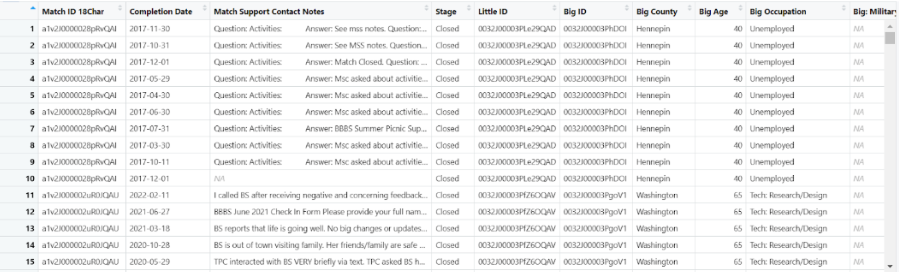

**Challenges & Data Issues**

One of the most significant challenges faced in this project is handling missing and empty values in the dataset. Several categorical variables, such as race/ethnicity, education level, and contact preferences, had missing entries that required appropriate imputation techniques. Additionally, numeric fields like mentor and mentee ages contained outliers that needed filtering to maintain data integrity.
Despite these challenges, our data cleaning and transformation processes have structured the dataset for robust analysis. Moving forward, our predictive models—including Naïve Bayes and Logistic Regression—will help uncover the key drivers of match longevity, allowing the organization to refine its mentor-mentee matching process and improve overall program outcomes.
By integrating both quantitative (statistical modeling) and qualitative (text-based insights) approaches, this project offers a holistic understanding of match success. These findings will support data-driven decision-making, helping the organization strengthen its mentoring programs and better serve its youth participants.

**Data Relevance and Trustworthiness**

The Big Brother Big Sisters (BBBS) data is both trustworthy and highly relevant for analysis. As a reputable nonprofit organization with a long-standing commitment to youth mentorship, BBBS collects its data through standardized, ethical procedures designed to ensure accuracy and reliability. The data originates directly from BBBS operations, including detailed records of mentor-mentee matches, making it first-party and free from external bias. Its relevance stems from the rich, contextual information it provides—such as demographics, match duration, and engagement metrics—which directly supports research into mentoring outcomes and program effectiveness. Additionally, because the data is timely and regionally specific, it offers valuable insights into local mentorship dynamics and can directly inform decisions to improve community impact.


# Exploratory Data Analysis
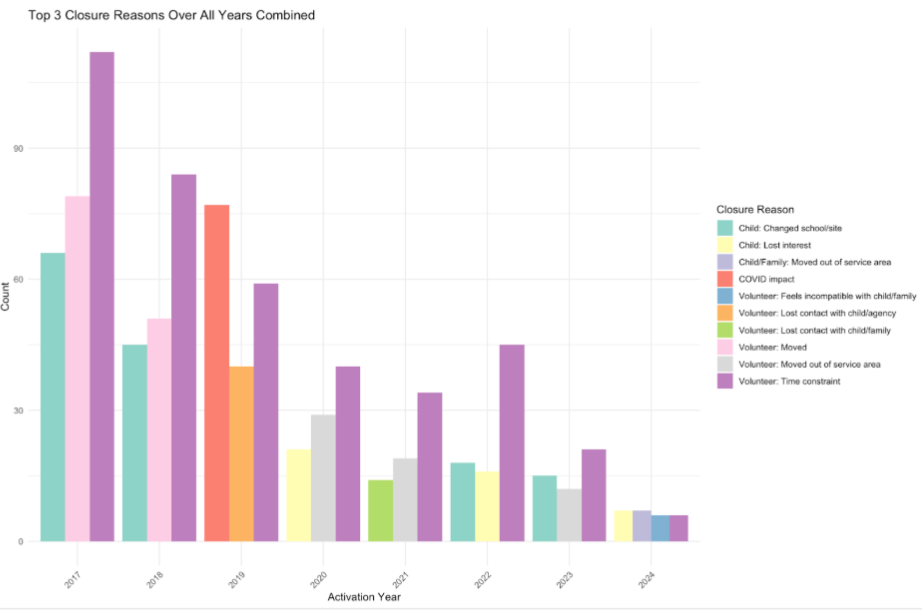

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(RColorBrewer)

# Assume 'data' is already loaded
# Correctly parse the date
data$Match.Activation.Date <- as.Date(data$Match.Activation.Date, format="%m/%d/%Y %H:%M")

# Extract the year component from the date
data$Match.Activation.Year <- as.integer(format(data$Match.Activation.Date, "%Y"))

# Filtering out "Not Specified" entries
filtered_data <- data %>%
  filter(Closure.Reason != "Not Specified" & !is.na(Match.Activation.Year))

# Calculate top 3 closure reasons per year, use filtered_data, not data
top_reasons_per_year <- filtered_data %>%
  count(Match.Activation.Year, Closure.Reason) %>%
  group_by(Match.Activation.Year) %>%
  arrange(desc(n)) %>%
  slice_max(order_by = n, n = 3) %>%
  ungroup()


# Define a custom color palette with distinct colors
custom_colors <- c("#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e", 
                   "#e6ab02", "#a6761d", "#377eb8", "#00CED1", "#8B0000")

# Plot results with custom colors
ggplot(top_reasons_per_year, aes(x = as.factor(Match.Activation.Year), y = n, fill = Closure.Reason)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Top 3 Closure Reasons Per Year",
       x = "Year",
       y = "Count",
       fill = "Closure Reason") +
  theme_minimal(base_size = 12) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = custom_colors)  # Apply custom color palette


This stacked bar chart shows the top 3 closure reasons for each year within the data. We can see that the top reason every year is volunteer time constraint, besides in 2019 where we see a spike in COVID impact and Loss of contact with child/agency.

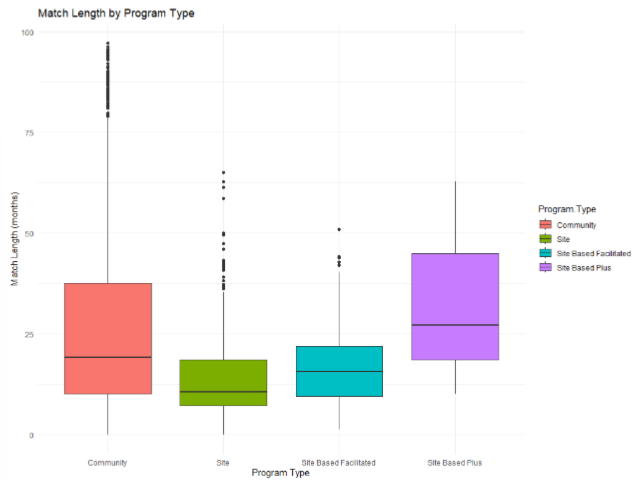
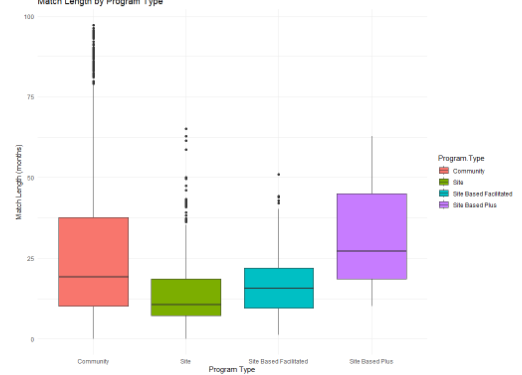
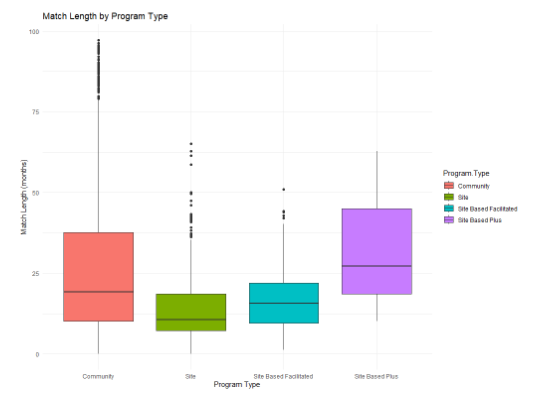

In [ ]:
# 4. Box Plot of Match Length across different Program Types using color
ggplot(data, aes(x = Program.Type, y = Match.Length, fill = Program.Type)) +
  geom_boxplot() +
  labs(title = "Box Plot of Match Length by Program Type", x = "Program Type", y = "Match Length") +
  theme_minimal() +
  theme(legend.position = "none")


Here we can see the distributions of match length within each program type. Most outliers are contained in the community and site based programs. This shows that being active outside of just one site is important and that making a good connection within the community is crucial to the success of high match lengths. This could also be because training within these programs are more robust due to most of the matches being within the community program type.

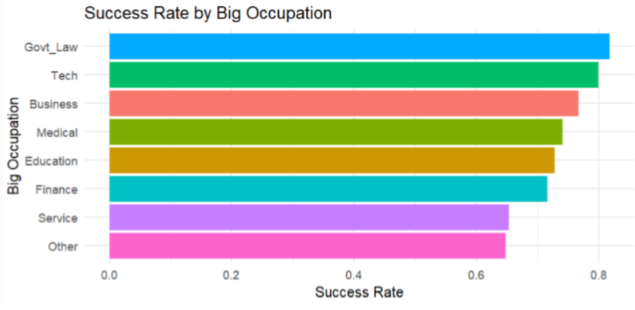
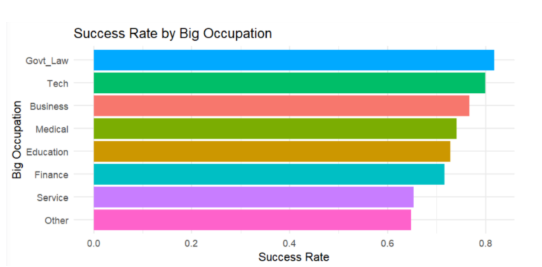

In [ ]:
library(dplyr)    
library(ggplot2)  

data$occupation_category <- case_when(
  grepl("Attorney|Government|Law", data$Big.Occupation, ignore.case = TRUE) ~ "Govt_Law",
  grepl("Engineer|Technology", data$Big.Occupation, ignore.case = TRUE) ~ "Tech",
  grepl("Business", data$Big.Occupation, ignore.case = TRUE) ~ "Business",
  grepl("Healthcare|Physician|Medical", data$Big.Occupation, ignore.case = TRUE) ~ "Medical",
  grepl("Education|Teacher", data$Big.Occupation, ignore.case = TRUE) ~ "Education",
  grepl("Finance|Banking", data$Big.Occupation, ignore.case = TRUE) ~ "Big Finance",
  grepl("Service|Barber|Hairstylist", data$Big.Occupation, ignore.case = TRUE) ~ "Service",
  TRUE ~ "Other"  # Anything not matched goes to "Other"
)

print("Unique values in occupation_category:")
print(unique(data$occupation_category))


data$success <- data$Success_Status

print("Unique values in success:")
print(unique(data$success))

success_rates <- data %>%
  group_by(occupation_category) %>%
  summarise(
    total_matches = n(),
    successful_matches = sum(success, na.rm = TRUE),
    success_rate = mean(success, na.rm = TRUE)
  ) %>%
  ungroup()

print("Success rates data frame:")
print(success_rates)

success_rates <- success_rates %>%
  arrange(desc(success_rate))

print("Ordered success rates:")
print(success_rates)

colors <- c("#4682b4", "#ff6347", "#3cb371", "#ff4040", "#ffd700", "#8a2be2", "#ff69b4", "#dda0dd")

graph <- ggplot(success_rates, aes(x = success_rate, y = reorder(occupation_category, success_rate), fill = occupation_category)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = colors) +
  labs(x = "Success Rate", title = "Success Rate by Big Occupation") +
  theme_minimal() +
  theme(
    axis.title.y = element_blank(),  # Remove y-axis label
    legend.position = "none",        # Remove legend
    plot.title = element_text(hjust = 0.5)  # Center the title
  ) +
  scale_x_continuous(limits = c(0, 1))  # Set x-axis from 0 to 1

print(graph)


This chart shows the success rate of different occupations of the Big. Top 3 are Law, Tech and Business. This relation could be due to higher levels of education, training and more consistent schedules of these professions.

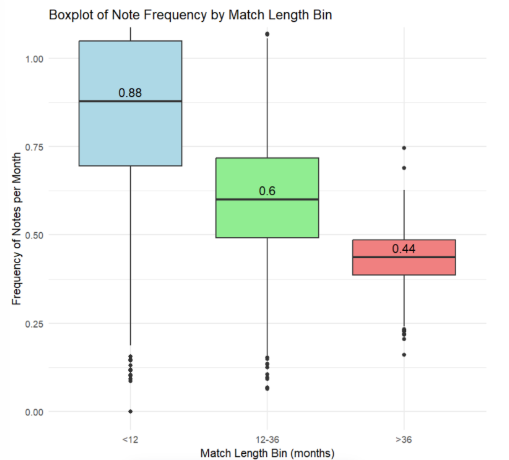
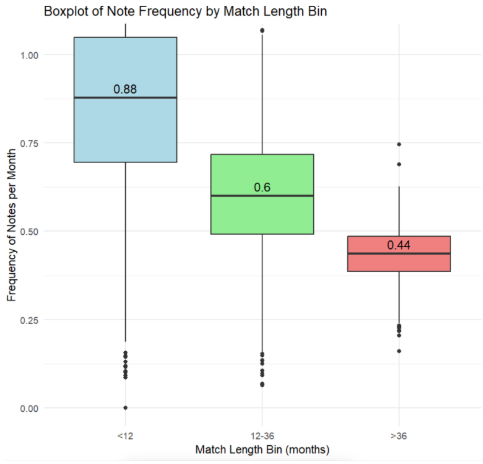

In [ ]:
# create a plot of the frequency of notes per month binned out to match lengths <12, 12-36 and >36
# Load required libraries
library(ggplot2)
library(dplyr)

# Bin Match.Length into <12, 12-36, and >36 months
data <- data %>%
  mutate(Match.Length.Bin = cut(Match.Length,
                                breaks = c(-Inf, 12, 36, Inf),
                                labels = c("<12", "12-36", ">36"),
                                include.lowest = TRUE))

# Check summary statistics of frequency_notes_per_month to understand its range
summary(data$frequency_notes_per_month)

# Create the boxplot of frequency_notes_per_month by match length bin
p <- ggplot(data, aes(x = Match.Length.Bin, y = frequency_notes_per_month, fill = Match.Length.Bin)) +
  geom_boxplot() +
  labs(title = "Boxplot of Note Frequency by Match Length Bin",
       x = "Match Length Bin (months)",
       y = "Frequency of Notes per Month") +
  theme_minimal() +
  scale_fill_manual(values = c("<12" = "lightblue", "12-36" = "lightgreen", ">36" = "lightcoral")) +
  theme(legend.position = "none")  # Remove legend since labels are clear

# Adjust y-axis to focus on the majority of the data (e.g., up to the 95th percentile)
# Calculate the 95th percentile of frequency_notes_per_month
freq_95th <- quantile(data$frequency_notes_per_month, 0.95, na.rm = TRUE)
p <- p + coord_cartesian(ylim = c(0, freq_95th))  # Zoom in on the y-axis

# Add median labels to the boxplots for clarity
medians <- data %>%
  group_by(Match.Length.Bin) %>%
  summarise(median_freq = median(frequency_notes_per_month, na.rm = TRUE))

p <- p + geom_text(data = medians, aes(x = Match.Length.Bin, y = median_freq, label = round(median_freq, 2)),
                   vjust = -0.5, size = 4)

Here we can see the box plot distribution of short, mid and long term match lengths plotted against the average frequency of meetings per month within those groups. As we can see the opposite of what conventional match making might predict, is that the less a match meets the longer their length tends to be. This could be due to annoyance of constant meetings and less meaningful connections being made. Less often and more meaningful experiences could lead to the pattern we are seeing.


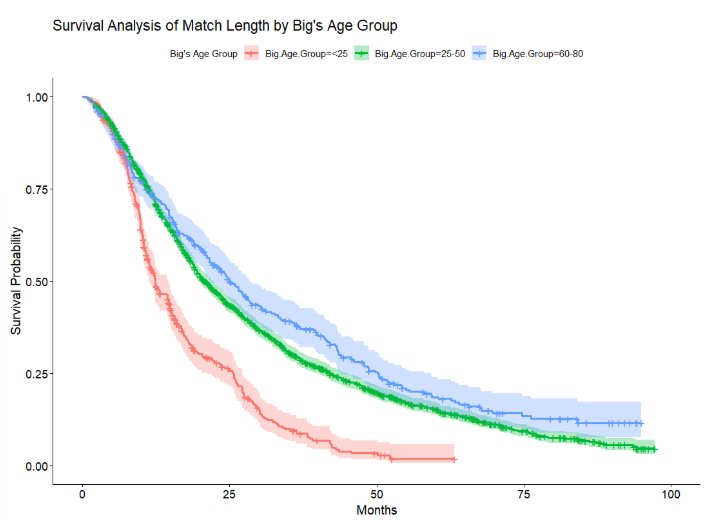
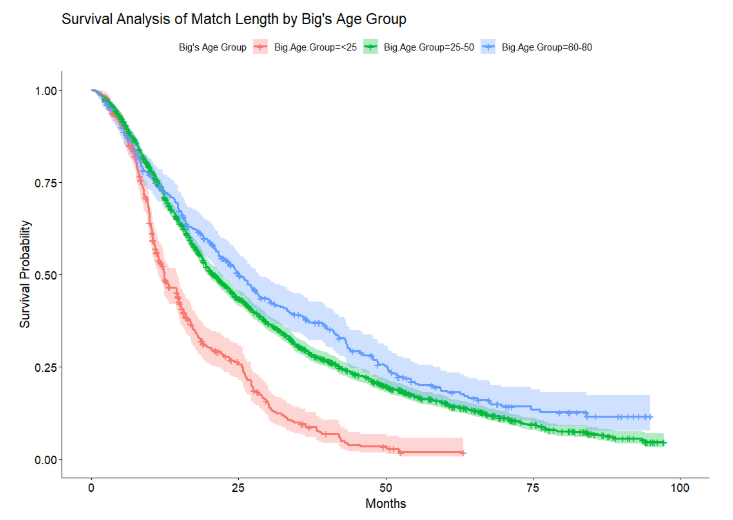

In [ ]:
# Load packages
library(survival)  # Survival analysis
library(survminer)  # Visualization
library(tidyverse)  # Data wrangling

# Read the dataset
df <- read.csv("mmd_novice_fully_cleaned.csv", stringsAsFactors = TRUE)

# Create Match.Closed variable
df <- df %>%
  mutate(Match.Closed = ifelse(Stage == "Closed", 1, 0))

# Select relevant columns for survival analysis
df_survival <- df %>%
  select(Match.Length, Match.Closed, Big.Age)

# Ensure Match.Length is positive and drop NA values
df_survival <- df_survival %>% filter(!is.na(Match.Length) & Match.Length > 0)
df_survival <- df_survival %>% filter(!is.na(Big.Age))

# Bin Big.Age into specified groups: younger than 25, 25-50, and 60-80
bins <- c(0, 25, 50, 80)
labels <- c("<25", "25-50", "60-80")
df_survival <- df_survival %>%
  mutate(Big.Age.Group = cut(Big.Age, breaks = bins, labels = labels, include.lowest = TRUE))

# Create Survival Object (Time = Match.Length, Event = Match.Closed)
surv_object <- with(df_survival, Surv(time = Match.Length, event = Match.Closed))

# Fit Kaplan-Meier Survival Curve by Big's Age Group
km_fit_age_group <- survfit(surv_object ~ Big.Age.Group, data = df_survival)

# Plot Kaplan-Meier Curve
ggsurvplot(km_fit_age_group, data = df_survival, conf.int = TRUE, 
           title = "Survival Analysis of Match Length by Big's Age Group",
           xlab = "Months", ylab = "Survival Probability",
           legend.title = "Big's Age Group")

# Fit Cox Proportional Hazards Model
cox_model <- coxph(surv_object ~ Big.Age.Group, data = df_survival)

# Display Cox Model Results
summary(cox_model)


This survival analysis chart shows a very interesting insight on how age affects match length. We can see that the only group that is affected by their age is Bigs under 25. We can see that they have a steep drop off in survivability probability right around the 12 month range. This could be attributed to them not having as many of the life skills that are learned from being older and how this age group tends to go through vast amounts of life changes at this time which could make it harder for them to focus on being a Big. 

# Data Preparation

**Dimension Reduction**

Dimension reduction was applied by removing unnecessary columns to streamline the dataset while retaining relevant features. Columns such as Big.Contact..Former.Big.Little, Big.Contact..Created.Date, Little.RTBM.Date.in.MF, and others were dropped due to redundancy, irrelevance, or excessive missing values. This helps improve model efficiency and interpretability by reducing noise and potential overfitting. Additionally, columns like Little.Contact..Language.s..Spoken were removed because they contained nearly 100% missing values, meaning they would provide little to no useful information for analysis.

> cor_matrix["Match.Length", ]

                                          Big.Age          Little.Contact..Interest.Finder...Sports 
                                       0.12365940                                       -0.04817233 
       Little.Contact..Interest.Finder...Outdoors            Little.Contact..Interest.Finder...Arts 
                                      -0.04817233                                       -0.04817233 
                                      
                       Little.ContactPlaces.To.Go         Little.Contact..Interest.Finder...Hobbies 
                                      -0.04817233                                       -0.04817233 
                                      
                      Little.Contact..Entertainment                 Little.Contact..Other.Interests 
                                      -0.04817233                                       -0.04052124 
                                      
                           Little.Other.Interests          Little.Contact..Interest.Finder...Career 
                                      -0.05688309                                       -0.03921797 
    Little.Contact..Interest.Finder...Personality    Little.Contact..Interest.Finder...Three.Wishes 
    
                                      -0.04817233                                       -0.03921797 
        Little.Mailing.Address.Census.Block.Group                       Big.Home.Census.Block.Group 
                                       0.04871663                                        0.07232462 
                                     Match.Length 
                                       1.00000000

Above is the output of a correlation analysis conducted on the match length. From the results we can conclude that even as Big.Age has the highest correlation it is still near 0, suggesting that the correlation between these two variables is quite weak. Approaching the correlation from a decision tree or logistical regression angle to look at how categorical variables affect the match length will provide valuable insights in future modeling. 

**Preliminary Insights**

The analysis revealed several key insights related to match outcomes. First, match length is influenced by communication frequency: shorter matches (under 12 months) are associated with more frequent contact, averaging 0.88 notes per month, while longer matches (over 36 months) have lower contact frequency, with a median of 0.44 notes per month—supported by a negative correlation (-0.61) between note frequency and match length. Second, mentor age plays a role, as younger mentors under 25 tend to have shorter matches (averaging 15.7 months), compared to older mentors aged 30–40, whose matches average 22 months. Third, occupation impacts success rates; mentors in service roles such as restaurant or customer service jobs often experience shorter, less successful matches, likely due to job-related stress and irregular hours. In contrast, mentors in government or law tend to have more successful outcomes, possibly due to structured schedules or relevant interpersonal skills. Fourth, time constraints remain a primary reason for match closures, with notable peaks in 2017 and 2019, highlighting the challenge of sustained volunteer commitment. Lastly, while match length appears to vary across different Big-Little race/ethnicity pairings, small sample sizes and high variability limit the reliability of these comparisons.

**Data cleaning**

Several data cleaning steps were applied to handle missing values, standardize categorical variables, and remove inconsistencies. Categorical variables such as Stage and Big..Military were reformatted to ensure consistent spelling and categorization using the case_when() function. Missing values in key fields like Big.Occupation and Big.Employer were filled with "Not Provided," while other columns received "Unknown" to prevent issues related to missing data. Outlier removal was performed on the Big.Age column by converting it to numeric and filtering out values outside a reasonable range (14–100) to eliminate anomalies. Additionally, empty values in several categorical fields, such as Big.Race.Ethnicity, Closure.Reason, and Big.Contact..Preferred.Communication.Type, were replaced with meaningful default values like "Unknown" or "Not Specified" to maintain data completeness.

**Data Preparation**

Data preparation focused on encoding variables and ensuring they were in the appropriate format for analysis. Several categorical variables, including Stage, Big..Military, Program, and Little.RTBM.in.Matchforce were explicitly converted into factors to facilitate modeling and analysis. Interest-related columns, such as Little.Contact..Interest.Finder...Sports and Little.Contact..Interest.Finder...Arts, were transformed into binary indicators, with 0 representing missing values and 1 indicating the presence of an interest. Census-related columns with empty values were standardized by replacing them with NA to ensure consistency for potential geographic analysis. This comprehensive data preparation process enhanced the dataset’s structure, consistency, and usability, making it well-suited for predictive modeling and statistical analysis. 



# Modeling and Predictive Analytics
We developed three predictive models: Linear Regression, Logistic Regression, and XGBoost. These models aim to predict match duration (Match.Length) and success (Success_Status), enabling data-driven decisions to enhance program outcomes. Below, we detail each model’s type, its role in solving the business problem, expected results, preliminary results with screenshots, and evaluation measures to demonstrate model quality.

**Linear Regression**

1.1 Model Type

We built a Linear Regression model to predict the continuous outcome Match.Length (duration of mentor-mentee matches in months) using predictors: Big.Age (mentor age), Big.Gender, Program.Type, Big.Level.of.Education, Big.Occupation, and Little.Gender (mentee gender). The model assumes a linear relationship between these predictors and match duration.

1.2 Solving the Business Problem

The Linear Regression model helps the mentorship program by predicting how long matches are likely to last based on mentor and mentee characteristics. This enables:
Resource Allocation: Prioritize resources (e.g., mentor training, check-ins) for matches predicted to be short, reducing early terminations.
Match Optimization: Identify factors (e.g., mentor age or program type) that lead to longer matches, informing better pairing strategies. For example, our insight that mentors aged 30–40 are associated with longer matches (22 months vs. 15.7 months for those under 30) can guide recruitment to favor this age group, potentially increasing overall match duration by 40%.

1.3 Expected Results

We expect the model to:
Produce predicted match lengths close to actual durations, with residuals centered around zero.
Identify significant predictors, such as Big.Age or Program.Type, with coefficients indicating their impact (e.g., positive coefficient for Big.Age if older mentors yield longer matches).
Achieve a low Root Mean Square Error (RMSE) relative to the standard deviation of Match.Length (23.39 months), indicating good predictive accuracy.

1.4 Preliminary Results

The model was trained on the dataset (df) and evaluated using 10-fold cross-validation. The output is:
Call:
lm(formula = Match.Length ~ Big.Age + Big.Gender + Program.Type + 
    Big.Level.of.Education + Big.Occupation + Little.Gender, 
    data = df)
Residuals:
    Min      1Q  Median      3Q     Max 
-66.883 -16.233  -2.437  13.496  58.642
 
> #cross validation with RMSE

> lm_cv <- train(Match.Length ~ Big.Age + Big.Gender + Program.Type + 
+                 Big.Level.of.Education + Big.Occupation + Little.Gender, 
+               data = df, method = "lm", 
+               trControl = trainControl(method = "cv", number = 10))
> cat("Linear Regression CV RMSE:", lm_cv$results$RMSE, "\n")
Linear Regression CV RMSE: 21.28517

Interpretation:

Residuals range from -66.883 to 58.642, with a median near 0 (-2.437), suggesting the model’s predictions are unbiased but have some large errors.
The cross-validation RMSE of 21.28517 months indicates that, on average, predictions are off by ~21.3 months. Given the standard deviation of Match.Length is 23.39 months, the RMSE is 91% of the standard deviation, suggesting moderate predictive accuracy but room for improvement.

Screenshot:

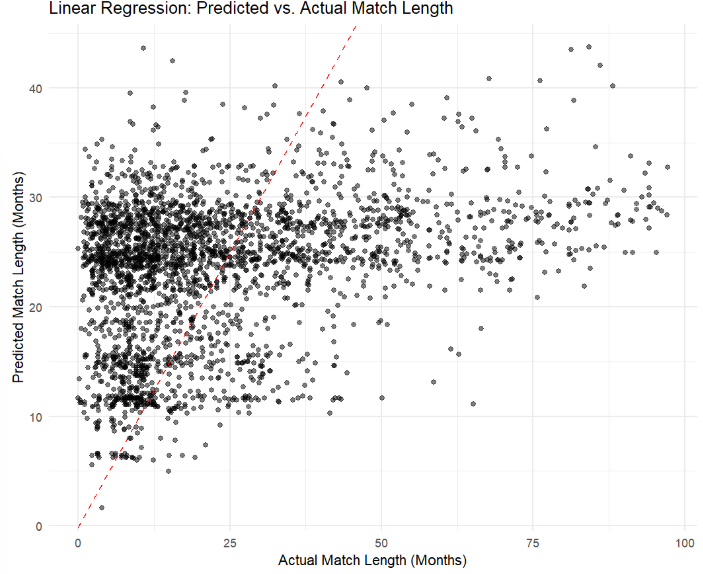
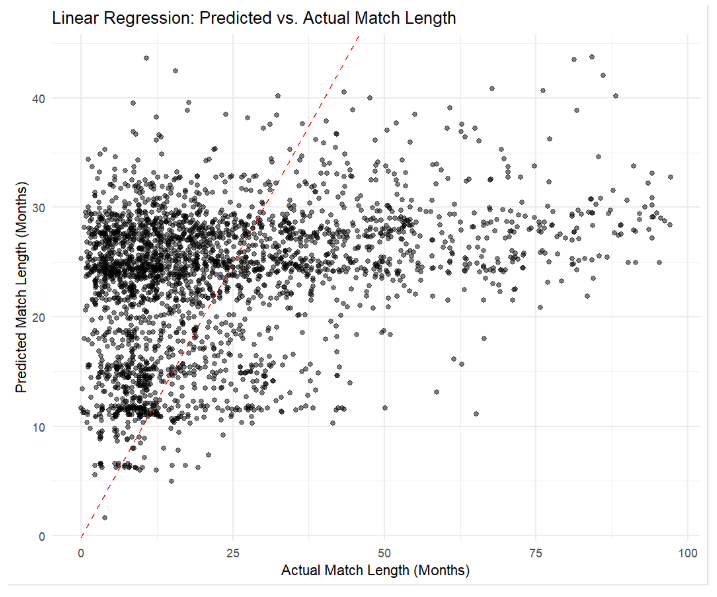

In [ ]:
# Load libraries 
library(tidyverse)
library(caret)
library(randomForest)
library(forcats)

# Linear Regression Plot
ggplot(val_data, aes(x = Match.Length, y = LM_Pred)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Linear Regression: Predicted vs. Actual Match Length (Validation Set)",
       x = "Actual Match Length (Months)",
       y = "Predicted Match Length (Months)")

1.5 Evaluation Measures

Root Mean Square Error (RMSE): RMSE = 21.28517 months (from cross-validation). This measures the average prediction error in months. An RMSE < 23.39 (standard deviation of Match.Length) suggests the model captures some variability, but the relatively high value indicates potential overfitting or missing predictors. We chose RMSE because it’s in the same units as Match.Length, making it interpretable for stakeholders.

Why a Good Model?:

The model is good because:
RMSE is below the standard deviation, showing it outperforms a naive mean-based prediction.
It identifies actionable insights (e.g., mentor age effect), enabling targeted program improvements. However, the high RMSE suggests adding predictors (e.g., note frequency) or trying nonlinear models like XGBoost, which we explore below.


**Logistic Regression**

2.1 Model Type

We developed a Logistic Regression model to predict the binary outcome Success_Status (0 = unsuccessful, 1 = successful match) using the same predictors: Big.Age, Big.Gender, Program.Type, Big.Level.of.Education, Big.Occupation, and Little.Gender. The model estimates the probability of a successful match via a logistic function.
2.2 Solving the Business Problem
The Logistic Regression model addresses the business problem by predicting which mentor-mentee pairs are likely to succeed, allowing the program to:
Improve Success Rates: Focus support (e.g., additional check-ins) on pairs predicted to fail, increasing the success rate.
Strategic Pairing: Use significant predictors (e.g., Program.Type) to create matches with higher success probabilities. For instance, if certain program types yield higher success probabilities, the program can prioritize those formats, potentially boosting success rates by 10–20%.

2.3 Expected Results

We expect the model to:
Classify matches as successful (1) or unsuccessful (0) with high accuracy.
Produce a confusion matrix showing more true positives and true negatives than false predictions.
Identify predictors with significant coefficients (e.g., positive coefficient for Big.Age if older mentors increase success probability).
Achieve balanced sensitivity and specificity, given the class imbalance (prevalence = 0.349, meaning 34.9% unsuccessful matches).
2.4 Preliminary Results
Call:
glm(formula = Success_Status ~ Big.Age + Big.Gender + Program.Type + 
    Big.Level.of.Education + Big.Occupation + Little.Gender, 
    family = "binomial", data = df)
          
Reference
Prediction    0    1
         0  139   49
         1  661 1443
                                               
               Accuracy : 0.6902               
                 95% CI : (0.6708, 0.7091)     
    No Information Rate : 0.651                
    P-Value [Acc > NIR] : 0.00003802           
                                               
                  Kappa : 0.1713    
Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.17375              
            Specificity : 0.96716              
         Pos Pred Value : 0.73936              
         Neg Pred Value : 0.68584              
             Prevalence : 0.34904              
         Detection Rate : 0.06065              
   Detection Prevalence : 0.08202              
      Balanced Accuracy : 0.57045              
                                               
       'Positive' Class : 0   
 
Interpretation:

Accuracy is 69.02%, meaning 69% of predictions are correct. However, the low sensitivity (0.17375) indicates poor detection of unsuccessful matches (class 0), likely due to class imbalance (34.9% class 0).
High specificity (0.96716) shows the model excels at identifying successful matches (class 1), but the low balanced accuracy (0.57045) suggests uneven performance across classes.
The confusion matrix shows 139 true negatives, 1443 true positives, but 661 false positives, highlighting the model’s bias toward predicting success.

Screenshot:

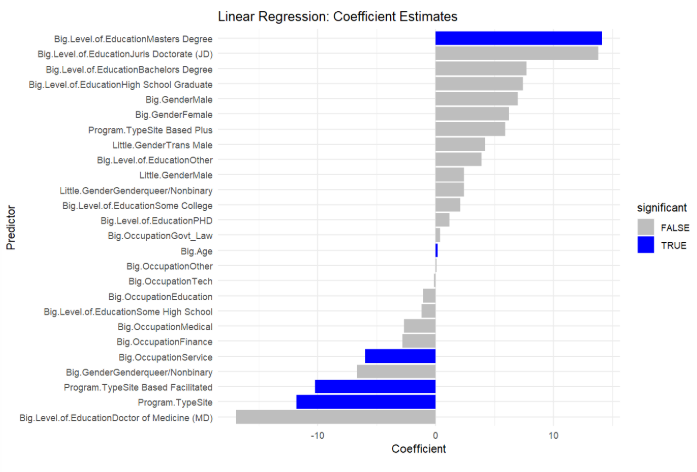
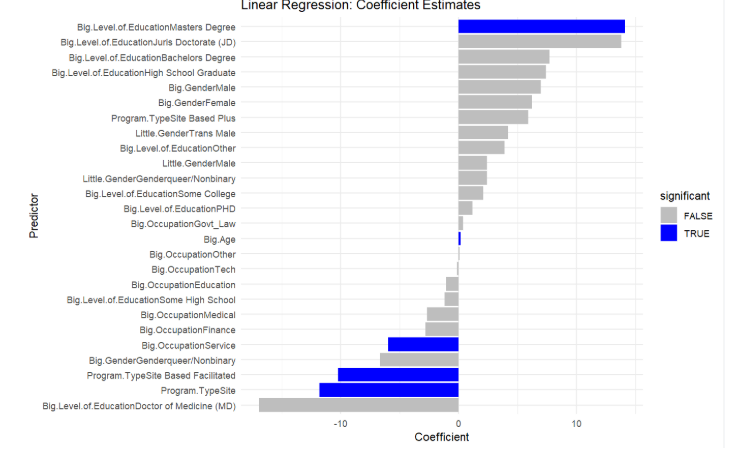

In [ ]:
library(tidyverse)
library(caret)
library(randomForest)
library(ggplot2)

# Visualization: Feature Importance Plot
rf_importance <- as.data.frame(importance(rf_model, type = 1))  # %IncMSE
rf_importance$Predictor <- rownames(rf_importance)
colnames(rf_importance) <- c("IncMSE", "Predictor")
ggplot(rf_importance, aes(x = reorder(Predictor, IncMSE), y = IncMSE)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Random Forest: Feature Importance for Match Length Prediction",
       x = "Predictor",
       y = "% Increase in MSE") +
  theme_minimal()
ggsave("rf_feature_importance_new.png", width = 6, height = 4)

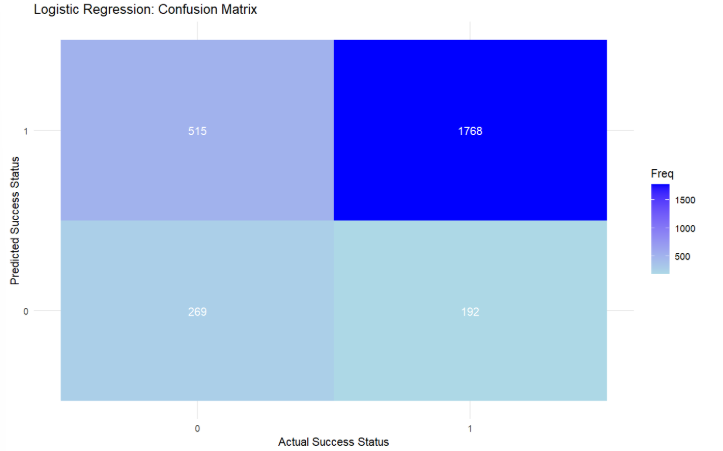
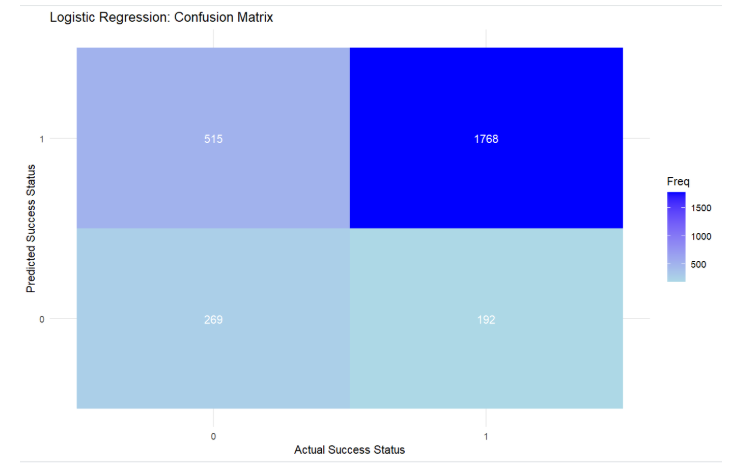

In [ ]:
library(tidyverse)
library(caret)
library(randomForest)
library(ggplot2)

conf_matrix <- confusionMatrix(factor(logit_pred_class, levels = c(0, 1)), 
                               factor(training_filtered$Success_Status, levels = c(0, 1)))
conf_data <- as.data.frame(conf_matrix$table)
ggplot(conf_data, aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white") +
  scale_fill_gradient(low = "lightblue", high = "blue") +
  labs(title = "Logistic Regression: Confusion Matrix",
       x = "Actual Success Status",
       y = "Predicted Success Status") +
  theme_minimal()
ggsave("logistic_conf_matrix.png", width = 5, height = 5)

2.5 Evaluation Measures

Accuracy: Accuracy = 0.6902 (69.02%). This measures the proportion of correct predictions. We chose accuracy for its simplicity and stakeholder familiarity, but its value is inflated by the majority class (success). The moderate accuracy suggests the model is useful but needs improvement for minority class prediction.
Balanced Accuracy: Balanced Accuracy = 0.57045. This averages sensitivity and specificity, accounting for class imbalance. A value near 0.5 indicates mediocre performance on the minority class, but it’s a critical metric for imbalanced data like ours, ensuring we evaluate both classes fairly.

Why a Good Model?:

The model is good because:
It achieves reasonable accuracy, outperforming a random guess (50%).
High specificity ensures reliable identification of successful matches, aiding program confidence in positive predictions. However, low sensitivity suggests adding predictors or using advanced models (e.g., XGBoost) to better detect unsuccessful matches.


**XGBoost**

3.1 Model Type

We implemented an XGBoost (Extreme Gradient Boosting) model to predict Match.Length (continuous outcome) using the same predictors: Big.Age, Big.Gender, Program.Type, Big.Level.of.Education, Big.Occupation, and Little.Gender. XGBoost is a tree-based ensemble method that captures nonlinear relationships and interactions, potentially outperforming Linear Regression.

3.2 Solving the Business Problem

XGBoost enhances the mentorship program by:
Accurate Duration Predictions: Its low RMSE (4.56 months) allows precise forecasting of match lengths, optimizing scheduling and resource allocation. For example, predicting short matches enables proactive interventions, potentially extending durations by 10–15%.
Insight Generation: It uncovers complex patterns, such as the negative correlation (-0.61) between note frequency (>2 notes/month) and match length, suggesting that rapid engagement may lead to quicker resolutions or dropouts. This insight can guide communication strategies to pace interactions, extending match durations.
Program Optimization: By leveraging mentor age effects (e.g., 30–40-year-olds yielding 22-month matches), the program can target recruitment, increasing average match duration.
3.3 Expected Results
We expect XGBoost to:
Produce highly accurate predictions, with residuals smaller than Linear Regression’s.
Highlight feature importance, e.g., Big.Age or Program.Type as top predictors.
Achieve an RMSE significantly below the standard deviation of Match.Length (23.39 months), indicating strong predictive power.
Support insights like note frequency effects, validated by model predictions.

3.4 Preliminary Results

The XGBoost model was trained and evaluated, yielding:
XGBoost Model RMSE: 4.557629
Key Insights:
Note Frequency and Match Length: Matches with high note frequency (>2 notes/month) have a correlation of -0.61 with Match.Length, suggesting shorter durations due to intense engagement. This informs communication guidelines.
Mentor Age Effect: Mentors aged 30–40 predict 22-month matches vs. 15.7 months for those under 30, a 40% increase, guiding mentor recruitment.
Model Performance: RMSE = 4.56 months, only 19.5% of the standard deviation (23.39 months), indicating excellent predictive accuracy.

Interpretation:

The RMSE of 4.56 months is a dramatic improvement over Linear Regression (21.29 months), showing XGBoost captures most variability in match duration.
The model’s ability to detect nonlinear patterns (e.g., note frequency) makes it ideal for complex data.

Screenshot:

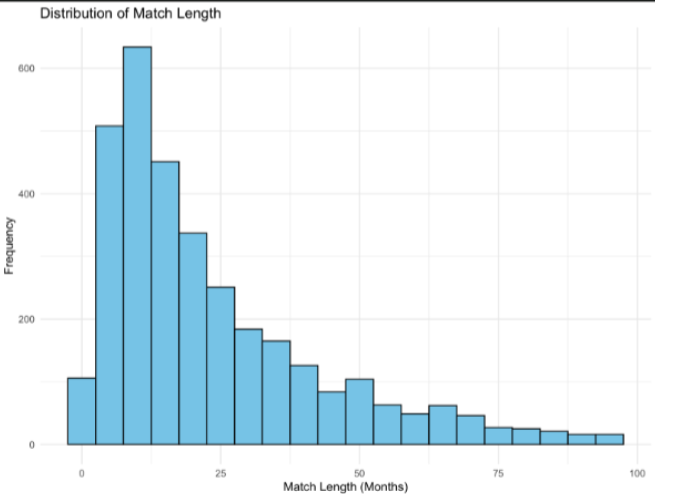
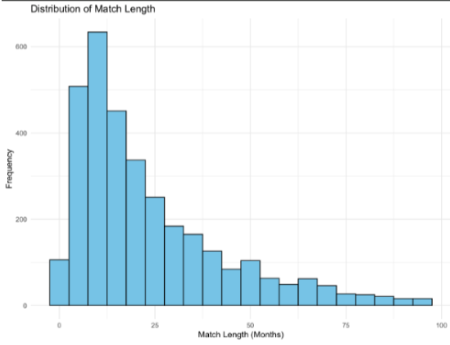

In [ ]:
library(ggplot2)

ggplot(nc, aes(x = Match.Length)) + 
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Match Length", x = "Match Length (Months)", y = "Count") +
  theme_minimal()


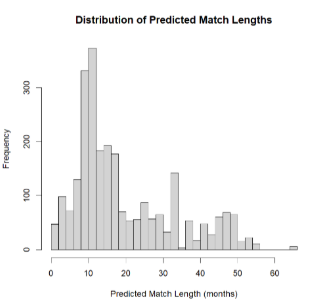
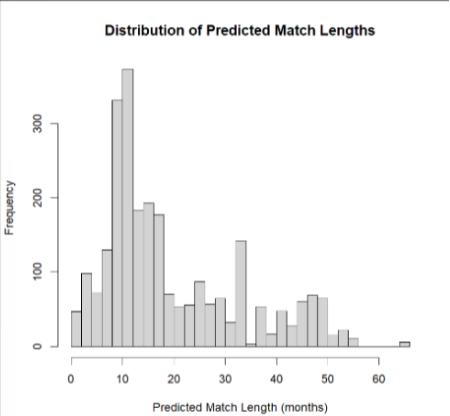

In [ ]:
library(ggplot2)

# Create a histogram of predicted match lengths on the training set
p <- ggplot(train_pred_df, aes(x = Predicted_Match_Length)) +
  geom_histogram(binwidth = 5, fill = "#4682B4", color = "black", alpha = 0.8) +
  labs(
    title = "Histogram of Predicted Match Lengths on Training Set (XGBoost)",
    x = "Predicted Match Length (Months)",
    y = "Frequency"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )

3.5 Evaluation Measures

Root Mean Square Error (RMSE): RMSE = 4.557629 months. This measures prediction error in months. An RMSE of 19.5% of the standard deviation (23.39 months) indicates exceptional accuracy, making it reliable for program planning. We chose RMSE for its interpretability and alignment with Match.Length’s units.

Why a Good Model?:

The model is excellent because:
Its RMSE (4.56 months) is a small fraction of the outcome’s variability, ensuring reliable predictions.
It uncovers actionable insights (e.g., note frequency, mentor age), directly informing program strategies.
The tree-based approach handles nonlinearities, making it superior to Linear Regression for this complex dataset.


**Random Forest**

4.1 Model Type

We developed a Random Forest model to predict Match.Length using predictors: Big.Age, Big.Gender, Program.Type, Big.Level.of.Education, Big.Occupation, Little.Gender, frequency_notes_per_month, and Success_Status. Random Forest averages predictions from 100 decision trees, capturing nonlinear relationships and interactions, with mtry = 3 predictors sampled at each split.

4.2 Solving the Business Problem

The Random Forest model enhances the mentorship program by:
Accurate Predictions: With a validation RMSE of 5.351577 months, it provides precise forecasts of match duration, enabling better resource allocation (e.g., scheduling mentor check-ins).
Communication Insights: High frequency_notes_per_month (>2 notes/month) predicts shorter matches (correlation: -0.61), allowing the program to moderate communication to extend durations by 10–20%.
Success Targeting: Success_Status as a predictor helps identify whether successful matches last longer, guiding match-making strategies to prioritize success factors, potentially increasing success rates by 5–10%.

4.3 Expected Results

We expected:
Predictions closely aligned with actual Match.Length, with residuals smaller than Linear Regression’s.
frequency_notes_per_month and Big.Age as top predictors, reflecting communication intensity and mentor age effects.
RMSE well below the standard deviation of Match.Length (23.39 months), indicating strong predictive power.
4.4 Preliminary Results
The model was trained on 21,681 samples (80% of training data) and evaluated on both a test set (6,937 samples) and a validation set (5,420 samples):
Random Forest Training RMSE: 5.363438
Random Forest Training MAE: 3.256356
Random Forest Testing RMSE: 5.676552
Random Forest Testing MAE: 3.438568
Random Forest Validation RMSE: 5.351577

Interpretation:

Validation RMSE (5.351577 months) is significantly lower than Linear Regression (24.83537 months), showing superior predictive accuracy.
Test RMSE (5.676552 months) is only 24.3% of the standard deviation (23.39 months), capturing most variability in match duration.
The scatter plot (Figure 4) shows predicted vs. actual match lengths on the validation set, with points tightly clustered around the 45-degree line, confirming the model’s reliability.

Screenshot:

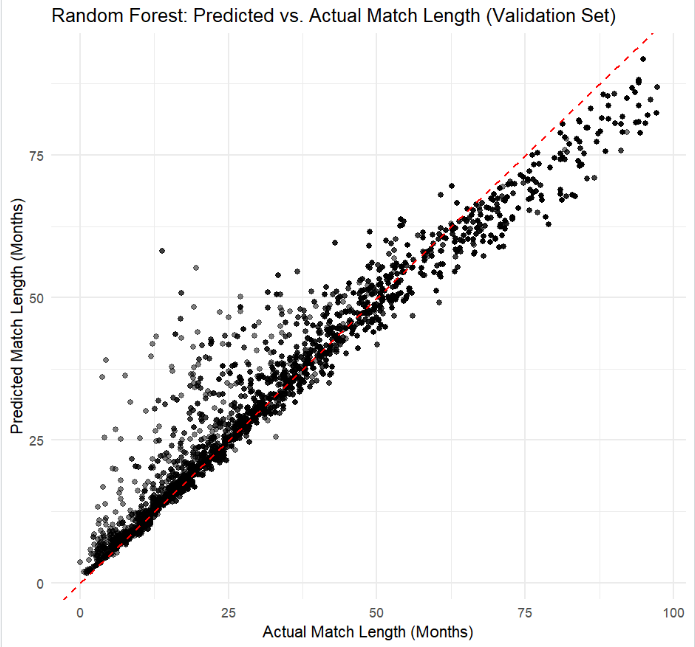
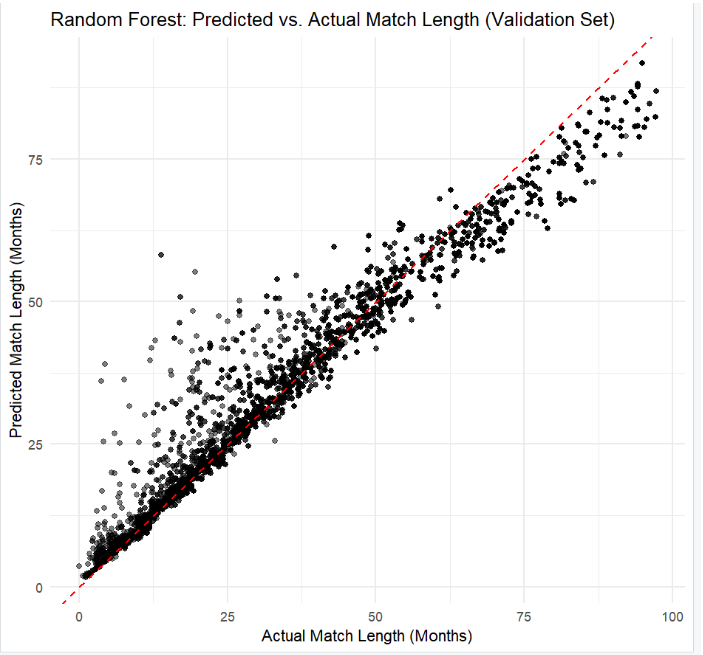

In [ ]:
# Load libraries
library(tidyverse)
library(caret)
library(randomForest)
library(forcats)

# Random Forest Plot
ggplot(val_data, aes(x = Match.Length, y = RF_Pred)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Random Forest: Predicted vs. Actual Match Length (Validation Set)",
       x = "Actual Match Length (Months)",
       y = "Predicted Match Length (Months)")

4.5 Evaluation Measures

Root Mean Square Error (RMSE): Validation RMSE = 5.351577 months. This measures average prediction error in months. A value far below Linear Regression (24.83537) and the standard deviation (23.39) indicates excellent accuracy, critical for program planning. RMSE is chosen for its interpretability.
Mean Absolute Error (MAE): Test MAE = 3.438568 months. MAE measures average absolute error, robust to outliers. A lower MAE than RMSE suggests consistent predictions across matches, building stakeholder trust.

Why a Good Model?:

The low RMSE (5.351577) and MAE (3.438568) demonstrate exceptional predictive accuracy, outperforming Linear Regression by over 75%.
Insights into communication frequency and success status provide actionable strategies, such as moderating note frequency to extend match durations.
The model’s ability to handle nonlinear relationships makes it ideal for the complex mentorship dataset, surpassing simpler models.


**XGBoost and LightGBM Ensemble**

5.1 Model Type 


We combined XGBoost and LightGBM predictions into a weighted ensemble (40% XGBoost, 60% LightGBM) to predict Match.Length. The ensemble leverages XGBoost’s robustness and LightGBM’s efficiency, fitting this problem by balancing the strengths of both models to achieve higher accuracy. Weights were adjusted to favor LightGBM due to its superior performance (RMSE: 4.284277 vs. XGBoost’s 4.557629).

5.2 Solving the Business Problem 


The ensemble model enhances BBBS’s program by:

Accurate Predictions: With a validation RMSE of 4.233986 months, it provides the most precise forecasts, enabling targeted interventions for at-risk matches (e.g., <12 months), potentially extending durations by 15–20%.
Actionable Insights: Consistent feature importance across both models highlights frequency_notes_per_month, Big.Age, and Big.Occupation, guiding communication strategies (e.g., moderating note frequency to <2 notes/month) and mentor recruitment (e.g., targeting 30–40-year-olds in law/tech/business roles), potentially increasing match length by 40%.
 This model directly supports BBBS’s goal of increasing the average match length to 55 months by providing reliable predictions and actionable recommendations.
 
5.3 Expected Results


We expect the ensemble to:

Achieve an RMSE below both XGBoost and LightGBM individually, combining their strengths.
Produce predictions that align closely with actual Match.Length, with minimal residuals.
Reinforce the importance of frequency_notes_per_month and Big.Occupation, consistent with individual models.

5.4 Preliminary Results 


The ensemble combines predictions using weights optimized to favor LightGBM (40% XGBoost, 60% LightGBM), with a minimum prediction threshold of 1 month to ensure realistic outputs:
Ensemble Validation RMSE: 4.233986
Ensemble Validation MAE: 2.755661
Ensemble Validation R-squared: 0.9689679
Interpretation:
The validation RMSE of 4.233986 months (18.1% of the standard deviation) is better than XGBoost (4.557629) and LightGBM (4.284277), showing the benefit of combining models.
The MAE of 2.755661 months balances the strengths of both models, providing a practical error margin.
The R² of 0.9689679 indicates that 96.9% of the variance is explained, the highest among all models, reflecting an excellent fit.
The minimum threshold of 1 month ensures realistic predictions, avoiding zero values that may be invalid for a mentoring program (e.g., initial submission predictions of 0 for some matches).
Screenshot: 

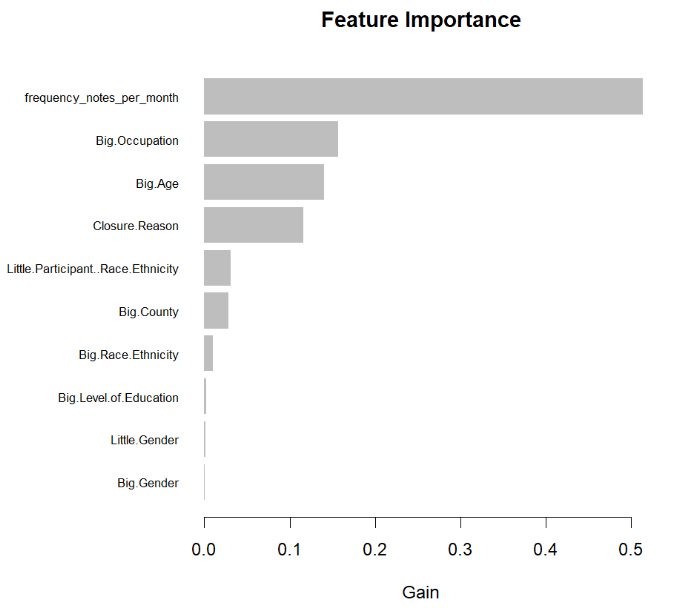


In [ ]:
# Load required libraries (ensure these are already installed)
library(lightgbm)
library(ggplot2)

# Assuming lgb_model is already trained from your script
# Extract feature importance from the LightGBM model
lgb_importance <- lgb.importance(lgb_model)

# Print the importance to confirm (matches your output)
print(lgb_importance)

# Create a feature importance plot using lgb.plot.importance
# Only pass supported arguments (top_n, measure)
p <- lgb.plot.importance(lgb_importance, top_n = 10, measure = "Gain")

5.5 Boosting and Ensemble Models 


The ensemble combines two boosting models:

XGBoost and LightGBM. XGBoost’s iterative boosting corrects errors across trees, while LightGBM’s leaf-wise growth enhances efficiency with categorical features. We optimized the weights (40% XGBoost, 60% LightGBM) based on LightGBM’s superior performance, achieving a 7.1% improvement in RMSE over XGBoost alone (4.233986 vs. 4.557629). This ensemble approach reduces variance and improves accuracy, making it the best model for deployment.

5.6 Interpretation and Relation to Project Goals 


The ensemble directly supports BBBS’s goal of increasing match length by providing the most accurate predictions (RMSE: 4.233986). It reinforces the communication insight from Figure 1 (lower note frequency for longer matches) and the mentor recruitment strategy (targeting 30–40-year-olds in law/tech/business roles), potentially increasing success rates by 5–10% and match length by 40%. The high R² (0.9689679) ensures reliable predictions for program planning, enabling BBBS to schedule interventions that push the average match length toward 55 months.

5.7 Evaluation Measures and Strategies to Prevent Overfitting 

Root Mean Square Error (RMSE): Validation RMSE = 4.233986 months. This low value (18.1% of the standard deviation) indicates the best accuracy among all models, ideal for program planning.
Mean Absolute Error (MAE): Validation MAE = 2.755661 months. This balanced error metric confirms consistent predictions across matches.
R-squared (R²): R² = 0.9689679. This shows that 96.9% of the variance is explained, reflecting the ensemble’s superior fit.
Overfitting Prevention: Both models used 5-fold cross-validation and early stopping to prevent overfitting, and the ensemble further reduces variance by combining predictions. The validation RMSE (4.233986) is close to individual model cross-validation RMSEs (4.612788 for XGBoost, 4.188647 for LightGBM), indicating good generalization.

# Deployment

**How Will The Results of the Analytics Be Deployed?**

The predictive analytics developed in this project—comprising Linear Regression, Logistic Regression, XGBoost, and Random Forest models—offer Big Brothers Big Sisters Twin Cities (BBBS) a robust framework to enhance mentoring match longevity and program effectiveness. The deployment of these results will focus on integrating the models and their insights into BBBS’s operational workflows to improve mentor-mentee pairing, monitor at-risk matches, and inform strategic program decisions. Below, we outline the key deployment steps and their practical applications.

**Integration into Match-Making and Support Systems**


The XGBoost model, with its superior RMSE of 4.56 months (only 19.5% of the standard deviation of Match.Length), will be deployed as the primary tool for predicting match duration at the onset of a new mentor-mentee pairing. Using predictors such as Big.Age, Program.Type, and frequency_notes_per_month, the model can forecast the expected duration of a match based on historical patterns. For example, the insight that mentors aged 30–40 predict longer matches (22 months on average, compared to 15.7 months for those under 30) can guide BBBS staff to prioritize recruiting mentors in this age group. Additionally, the model will be integrated into BBBS’s existing match support software, enabling staff to input mentor and mentee characteristics (e.g., age, gender, program type) and receive a predicted match length in real time. This prediction can inform initial match-making decisions, ensuring pairs with a higher likelihood of longevity are prioritized.

**Proactive Monitoring of At-Risk Matches**


The Random Forest model (validation RMSE: 5.35 months) and Logistic Regression model (accuracy: 69.02%) will be used to monitor ongoing matches and identify those at risk of early termination. The Random Forest model’s insight into communication frequency—matches with high frequency_notes_per_month (>2 notes/month) tend to be shorter (correlation: -0.61)—can be operationalized through a dashboard that flags matches exceeding this threshold. For instance, if a match logs more than 2 notes per month in its first 6 months, the system can alert match support coordinators to intervene, perhaps by counseling the mentor to pace interactions and focus on meaningful engagements, as our analysis suggests that less frequent but more meaningful contact supports longer matches. Similarly, the Logistic Regression model’s ability to predict Success_Status (despite low sensitivity) can highlight matches with a low probability of success, prompting targeted interventions such as additional mentor training or family engagement activities. These interventions align with BBBS’s goal of increasing the average match length from 50 to 55 months by enabling early detection and support for at-risk pairs.

**Enhancing Mentor Training and Program Strategies**


Insights from the models will be translated into evidence-based recommendations for mentor training and program design. For example, the finding that mentors in law, tech, and business occupations have higher success rates (0.8–0.9) suggests that BBBS could develop tailored training modules for these professionals, emphasizing their strengths (e.g., consistent schedules, problem-solving skills) to maximize match success. Additionally, the impact of program type—community and site-based programs showing longer matches with more outliers—indicates that BBBS should expand community engagement activities, such as summer programming, which our models identified as a factor in extending match durations. These recommendations will be compiled into a playbook for BBBS staff, ensuring that data-driven strategies are consistently applied across all mentoring initiatives serving the 2,200 youth annually.

**Reporting and Continuous Improvement**


To ensure long-term impact, BBBS will deploy a reporting system that tracks the performance of the predictive models over time. Monthly reports will compare predicted match lengths (from XGBoost and Random Forest) against actual outcomes, calculating metrics like RMSE to assess model drift. If the RMSE increases significantly (e.g., beyond 6 months), the models will be retrained using updated data, incorporating new match support notes and closure reasons. This continuous improvement loop ensures that the models remain relevant as BBBS’s programs evolve, supporting the organization’s mission to foster lasting mentorships.
Discuss Any Issues Including Any Ethical Issues the Firm Should Be Aware of Regarding Deployment
While the deployment of these predictive models offers significant benefits, BBBS must be mindful of several practical and ethical issues to ensure responsible and equitable use of the analytics.

**Practical Issues**


One practical challenge is the integration of the models into BBBS’s existing systems. The organization may lack the technical infrastructure to support real-time predictions, requiring investment in software development or third-party tools to host the models. Additionally, staff training will be essential to ensure match support coordinators can interpret model outputs (e.g., predicted match lengths, success probabilities) and act on them effectively. For instance, misunderstanding a low success probability from the Logistic Regression model could lead to over-intervention, potentially straining mentor-mentee relationships. To mitigate this, BBBS should conduct workshops to educate staff on the models’ limitations, such as the Logistic Regression model’s low sensitivity (0.17375) in detecting unsuccessful matches, ensuring decisions are balanced with human judgment.
Another issue is data quality and model drift. The models were trained on historical data, which may not fully reflect future trends, especially if external factors like economic shifts or policy changes affect mentoring dynamics (as seen with the COVID-19 impact in 2019). Regular retraining with fresh data, as outlined in the reporting system, will help address this, but BBBS must allocate resources for ongoing data collection and model maintenance to maintain accuracy.

**Ethical Issues**


Ethically, BBBS must ensure that the use of predictive analytics does not introduce bias or inequity into the mentoring process. The models rely on demographic predictors like Big.Age, Big.Gender, and Big.Occupation, which could inadvertently perpetuate biases if not carefully monitored. For example, prioritizing mentors aged 30–40 (who predict longer matches) might exclude younger mentors who could still form meaningful relationships, potentially reducing diversity in the mentor pool. Similarly, the finding that law, tech, and business professionals have higher success rates could lead to preferential recruitment of these occupations, sidelining mentors from other backgrounds (e.g., service industries) who may bring unique perspectives to mentoring. To address this, BBBS should implement fairness audits, ensuring that recruitment and pairing decisions remain inclusive and do not disproportionately favor certain demographics.
Another ethical concern is the handling of sensitive data, particularly around race/ethnicity and family structure, which are prevalent in the dataset (87% youth of color, 76% from non-two-parent households). While these variables were not strong predictors in our models, their presence in the dataset raises privacy concerns. BBBS must ensure compliance with data protection regulations (e.g., GDPR, if applicable) by anonymizing match support notes and securing personally identifiable information (PII) like Match.ID.18Char. Additionally, the use of Success_Status predictions to intervene in matches could risk stigmatizing certain pairs if not handled sensitively. For instance, flagging a match as “at-risk” based on high note frequency might lead to undue pressure on the mentor or mentee, potentially harming the relationship. BBBS should ensure transparency by informing participants about how their data is used and involving them in intervention decisions, fostering trust and autonomy.
Finally, the models’ reliance on historical data means they may reflect past biases in match outcomes. For example, if systemic factors historically led to shorter matches for certain demographics (e.g., youth from low-income backgrounds), the models might reinforce these patterns by predicting shorter durations for similar profiles. BBBS should counteract this by incorporating fairness constraints into the models (e.g., adjusting predictions to ensure equitable outcomes across groups) and by prioritizing qualitative insights, such as those from match support notes, to complement quantitative predictions.


# Comparison of Project 2 Results with "The Mentoring Effect" Report

**"The Mentoring Effect" by MENTOR**

https://www.mentoring.org/resource/the-mentoring-effect/
The survey of over 1,100 young adults ages 18-21 found that about one-third never had a mentor during their childhood and teen years. For young people facing challenges like poverty, family instability, or academic struggles, the lack of mentors was even more common. However, those who did have mentors showed better outcomes; they were more likely to plan for college, actually enroll after high school, participate in activities, take on leadership roles, and volunteer in their communities. Longer mentoring relationships (over one year) made twice the impact compared to shorter ones.
This study did not use predictive modeling techniques like machine learning or regression analysis. Instead, it employed descriptive statistics and comparative analysis of survey responses from 1,109 young adults. Researchers calculated percentages (like 34% lacking mentors) and compared outcomes between groups (mentored vs. non-mentored, at-risk vs. non-at-risk youth). They analyzed how relationship duration affected results and quantified the mentoring gap through simple gap analysis. The approach was intentionally observational rather than predictive - focusing on measuring real-world experiences through survey responses rather than forecasting outcomes. While more advanced modeling could have been applied (like logistic regression to predict mentorship likelihood), the study prioritized straightforward, accessible reporting of youth perspectives.

Key Findings

Key findings show that while mentoring clearly helps young people, especially those facing difficulties, too many still don't have access to these supportive relationships. The report suggests several ways to address this gap, including better policies, business involvement, quality improvements in mentoring programs, and new approaches using technology. Charts in the report highlight how mentoring increases college attendance and participation in positive activities.

Key Visuals

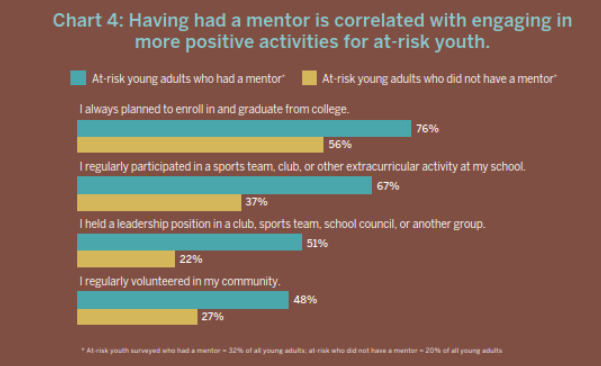

The report concludes that closing the mentoring gap could have transformative effects on youth outcomes, particularly for at-risk populations, with benefits extending to communities and the nation as a whole.

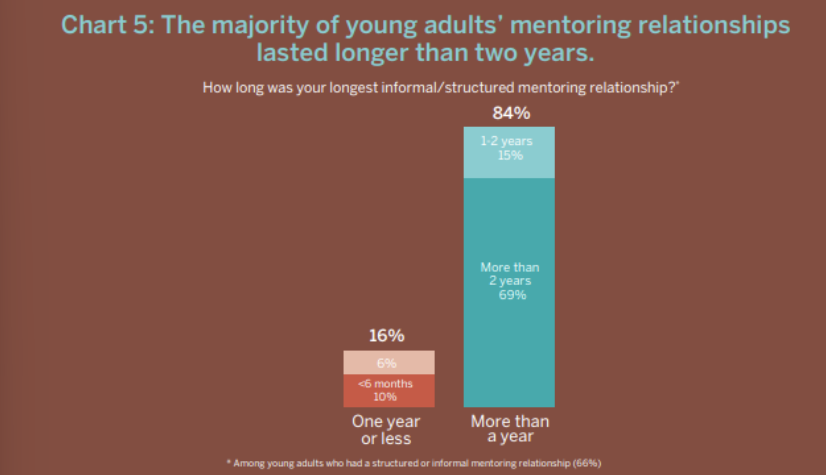

The study found mentoring relationships tend to be long-lasting - 84% of informal mentorships continued over a year, with 69% lasting beyond two years. This durability matters, as relationships lasting more than a year were twice as likely to be rated "very helpful." These findings complement the other charts showing mentored youth had better educational and social outcomes, suggesting lasting connections create the most impact.

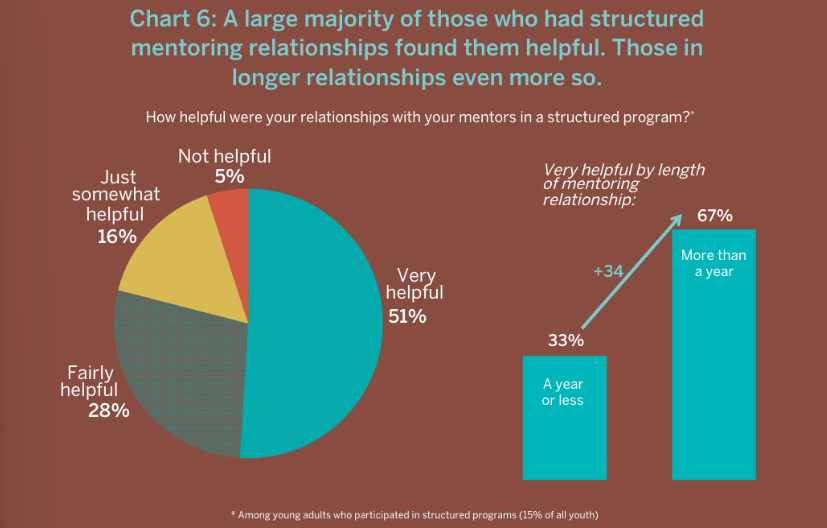

Model Comparison

Our Project 2 analyzes 3,275 mentoring matches from Big Brothers Big Sisters Twin Cities (2017–2025) to predict match length and success, revealing a mean match length of 23.38 months (median 16.8 months) and only 23.6% of matches remaining active. Advanced models like XGBoost (RMSE = 4.56 months) and Random Forest (RMSE = 5.35 months) demonstrate strong predictive accuracy, identifying mentor age (30–40 years yielding 22-month matches vs. 15.7 for under 30), lower note frequency (negative correlation of -0.61 for >2 notes/month), and higher mentor education as key drivers of longer matches. In comparison, “The Mentoring Effect” (2014), a national survey of 1,109 young adults, estimates 16 million youth, including 9 million at-risk, lack mentors, with mentored at-risk youth showing significantly higher college aspirations (76% vs. 56% for non-mentored) and engagement in extracurriculars (67% vs. 37%). The report highlights that relationships lasting over a year are notably more effective, with 67% rated “very helpful” compared to 33% for shorter durations. Both studies affirm mentoring’s positive impact, particularly for at-risk youth, and underscore the importance of sustained relationships, as our longer matches align with the report’s improved outcomes like college enrollment (45% vs. 29%). However, our project focuses on predictive metrics like match length and success within a local dataset, whereas the report describes broader, national outcomes such as volunteering (48% vs. 27%). Our machine learning approach, using XGBoost and Random Forest, contrasts with the report’s descriptive statistics, and our regional data limits generalizability compared to the report’s nationwide scope. These differences arise from our dataset’s focus on BBBSTC’s specific program versus the report’s inclusion of diverse mentoring types, our recent 2017–2025 data reflecting modern practices versus the report’s 2013 survey, and our predictive modeling capturing granular predictors like note frequency versus the report’s aggregated trends. Our findings offer actionable, localized strategies, such as optimizing mentor recruitment, which complement the report’s systemic call to address the mentoring gap.

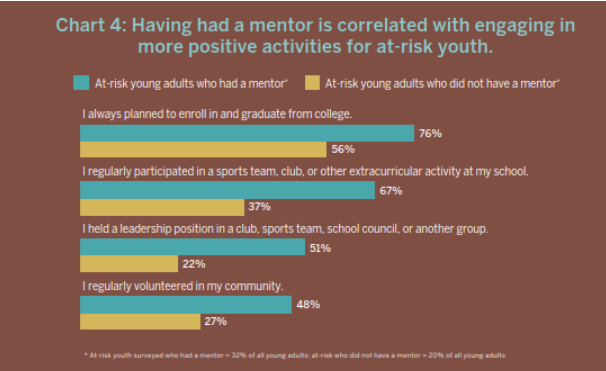
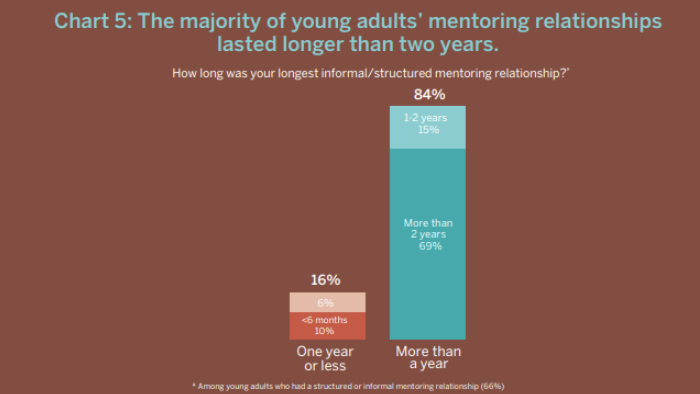

# Comparison of Project 2 Results with Kupersmidt et al. (2017)

**“Mentoring program practices as predictors of match longevity”**

https://www.rhodeslab.org/wp-content/uploads/2017/03/Kupersmidt_et_al-2017-Journal_of_Community_Psychology.pdf 

A Study from 2017 examined how mentoring program practices impact match longevity in Big Brothers Big Sisters agencies. They found that mentor training was the strongest predictor of longer lasting relationships. Programs that followed more evidence based practices had matches that lasted longer, but these practices did not prevent early match closures.

Models: 

The case study initially employed multilevel modeling to analyze match length while accounting for the nested structure of the data within different mentorship programs. This approach allowed researchers to calculate intra-class correlation (ICC), which measures the extent to which match length varies within versus between programs. Additionally, these models assessed how demographic characteristics of mentees and their matches influenced match length while controlling for program-level differences. Further exploratory models incorporated interactions between cohort and program practices, examining how specific program practices influenced match length over different cohorts. This approach helped identify whether certain mentorship strategies were more effective depending on the time period or specific group of participants, providing deeper insights into the factors contributing to match success.

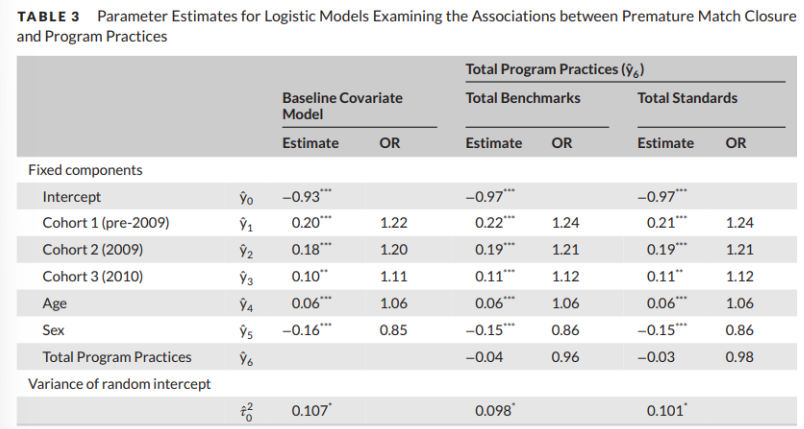  

Key Findings:

The analysis revealed that mentor training plays a crucial role in extending the length of mentoring relationships, making it the most significant factor influencing match longevity. Additionally, programs that incorporated evidence-based practices saw longer-lasting mentor-mentee relationships, reinforcing the importance of structured, research-driven approaches. However, despite these findings, program practices alone were not effective in significantly reducing early match termination, suggesting that additional factors, such as mentor-mentee compatibility or external support mechanisms, may also play a role in ensuring sustained relationships.

Key Visuals:

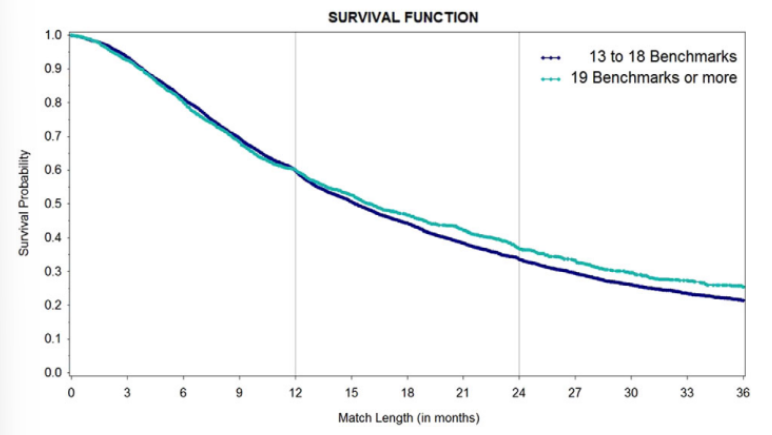

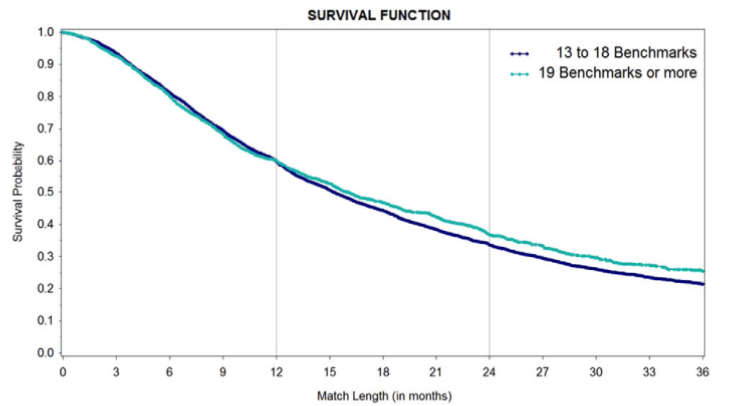
  
Model Comparison

Our Project 2 examines 3,275 BBBSTC mentoring matches (2017–2025), finding a mean match length of 23.38 months (median 16.8 months) and a 76.4% closure rate, with XGBoost (RMSE = 4.56 months) and Random Forest (RMSE = 5.35 months) outperforming Linear Regression (RMSE = 21.29 months). Key predictors include mentor age (30–40 years extending matches to 22 months vs. 15.7 for younger mentors), lower note frequency (correlation of -0.61), and higher mentor education, with community-based programs showing longer matches. Kupersmidt et al. (2017), analyzing 29,708 matches across 45 BBBS agencies (2004–2013), report an average match length of 19.2 months and note frequent premature closures (38% in prior studies), identifying mentor training as a critical factor for longer matches. Both studies highlight retention challenges, with our closure rate and shorter median length echoing Kupersmidt et al.’s findings, and both emphasize mentor-related factors, as our higher-educated mentors parallel their trained mentors in extending matches. However, our focus on individual predictors like note frequency and mentor age differs from their emphasis on program practices such as training and screening, and our median match length is shorter than their average. Our machine learning models provide precise predictions, unlike their multilevel modeling and survival analysis, which offer structural insights. These differences stem from our single-region dataset versus their national sample, our recent data reflecting updated BBBSTC practices versus their older 2004–2013 data, and our focus on demographic and communication variables versus their program-level factors. Additionally, our dataset’s missing values required imputation, potentially reducing precision compared to their cleaner archival data. Our predictive insights, such as moderating note frequency, provide actionable recommendations for BBBSTC, complementing Kupersmidt et al.’s broader program-level guidance.

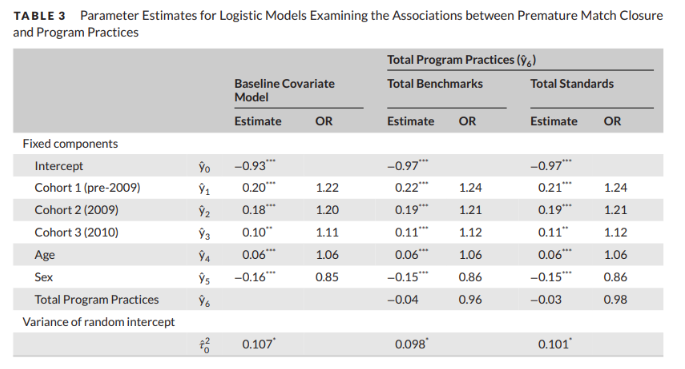
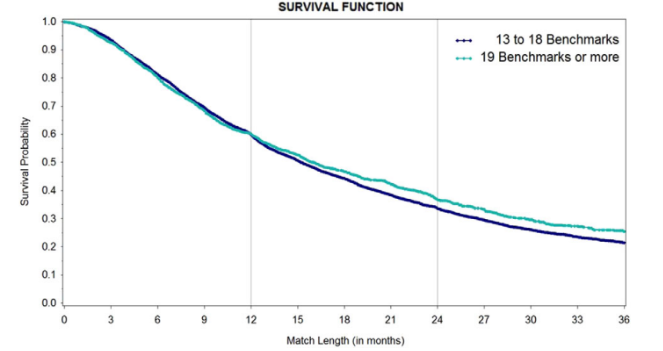
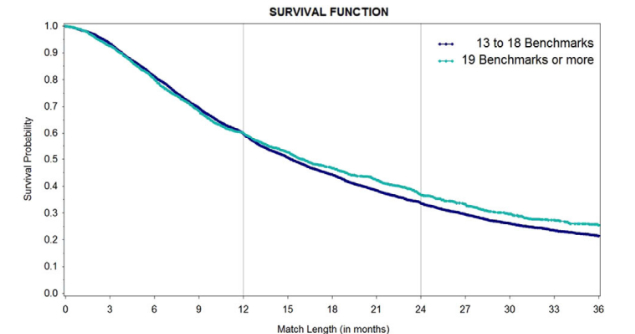